## **11-02 자연어 처리를 위한 1D CNN(1D Convolutional Neural Networks)**

https://wikidocs.net/80437

합성곱 신경망을 자연어 처리에서 사용하기 위한 1D CNN을 이해해보겠습니다.
---
### **1. 2D 합성곱(2D Convolutions)**

앞서 합성곱 신경망을 설명하며 합성곱 연산을 다음과 같이 정의했습니다.

```yaml
    합성곱 연산이란 커널(kernel) 또는 필터(filter) 라는 n × m 크기의 행렬로 높이(height) × 너비(width) 크기의 이미지를 처음부터 끝까지 겹치며 훑으면서 n × m 크기의 겹쳐지는 부분의 각 이미지와 커널의 원소의 값을 곱해서 모두 더한 값을 출력으로 하는 것을 말합니다. 이때, 이미지의 가장 왼쪽 위부터 가장 오른쪽 아래까지 순차적으로 훑습니다.
```

위와 같은 이미지 처리에서의 합성곱 연산을 2D 합성곱 연산이라고 부릅니다.

#### **2. 1D 합성곱(1D Convolutions)**

자연어 처리에 사용되는 1D 합성곱 연산을 정리해봅시다. LSTM을 이용한 여러 실습을 상기해보면, 각 문장은 임베딩 층(embedding layer)을 지나서 각 단어가 임베딩 벡터가 된 상태로 LSTM의 입력이 되었습니다. 이는 1D 합성곱 연산에서도 마찬가지입니다. 1D 합성곱 연산에서도 입력이 되는 것은 각 단어가 벡터로 변환된 문장 행렬로 LSTM과 입력을 받는 형태는 동일합니다.

'wait for the video and don't rent it'이라는 문장이 있을 때, 이 문장이 토큰화, 패딩, 임베딩 층(Embedding layer)을 거친다면 다음과 같은 문장 형태의 행렬로 변환될 것입니다. 아래 그림에서 $n$은 문장의 길이, $k$는 임베딩 벡터의 차원입니다.

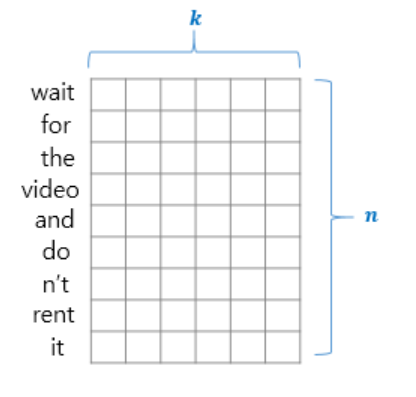

그리고 이 행렬이 만약 LSTM의 입력으로 주어진다면, LSTM은 첫번째 시점에는 첫번째 행을 입력으로 받고, 두번째 시점에는 두번째 행을 입력으로 받으며 순차적으로 단어를 처리합니다. 그렇다면 1D 합성곱 연산의 경우에는 저 행렬을 어떻게 처리할까요?

1D 합성곱 연산에서 커널의 너비는 문장 행렬에서의 임베딩 벡터의 차원과 동일하게 설정됩니다. 그렇기 때문에 1D 합성곱 연산에서는 커널의 높이만으로 해당 커널의 크기라고 간주합니다. 가령, 커널의 크기가 2인 경우에는 아래의 그림과 같이 높이가 2, 너비가 임베딩 벡터의 차원인 커널이 사용됩니다.

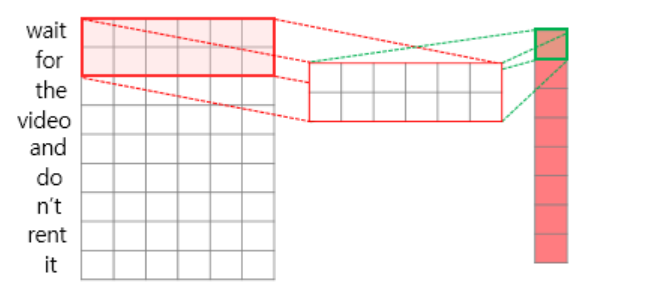

커널의 너비가 임베딩 벡터의 차원이라는 의미는 커널이 2D 합성곱 연산때와는 달리 너비 방향으로는 더 이상 움직일 곳이 없다는 것을 의미합니다. 그래서 1D 합성곱 연산에서는 커널이 문장 행렬의 높이 방향으로만 움직이게 되어있습니다. 쉽게 설명하면, 위 그림에서 커널은 2D 합성곱 연산때와는 달리 오른쪽으로는 움직일 공간이 없으므로, 아래쪽으로만 이동해야 합니다.


한 번의 연산을 1 스텝(step)이라고 하였을 때, 합성곱 연산의 네번째 스텝까지 표현한 이미지는 다음과 같습니다. 크기가 2인 커널은 처음에는 'wait for'에 대해서 합성곱 연산을 하고, 두번째 스텝에는 'for the'에 대해서 연산을, 세번째 스텝에는 'the video'에 대해서 연산을, 네번째 스텝에서는 'video and'에 대해서 연산을 하게 됩니다.

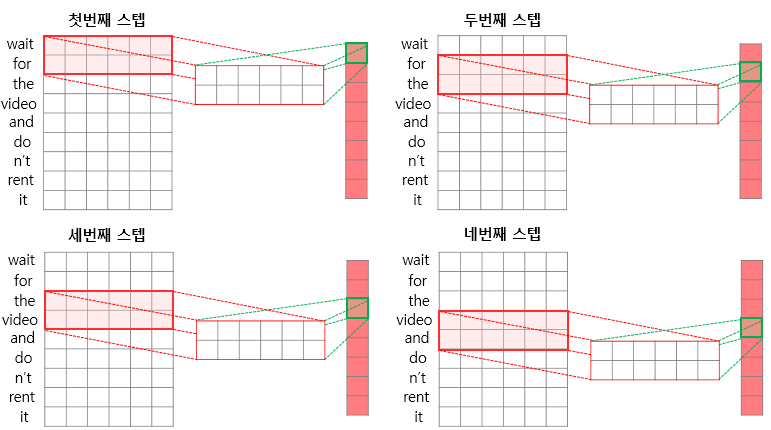

이렇게 여덟번째 스텝까지 반복하였을 때, 결과적으로는 우측의 8차원 벡터를 1D 합성곱 연산의 결과로서 얻게될 것입니다. 그런데 커널의 크기가 꼭 2일 필요가 있을까요? 2D 합성곱 연산에서 커널의 크기가 3 × 3 또는 5 × 5 또는 등등의 여러 크기의 커널을 자유자재로 사용할 수 있었듯이, 1D 합성곱 연산에서도 커널의 크기는 사용자가 변경할 수 있습니다. 가령, 커널의 크기를 3으로 한다면, 네번째 스텝에서의 연산은 아래의 그림과 같을 것입니다.

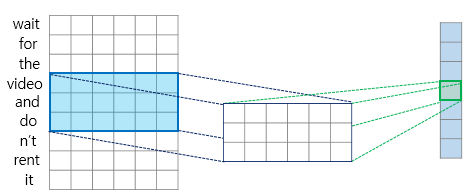

커널의 크기가 달라진다는 것은 어떤 의미가 있을까요? CNN에서의 커널은 신경망 관점에서는 가중치 행렬이므로 커널의 크기에 따라 학습하게 되는 파라미터의 수는 달라집니다. 1D 합성곱 연산과 자연어 처리 관점에서는 커널의 크기에 따라서 참고하는 단어의 묶음의 크기가 달라집니다. 이는 참고하는 n-gram이 달라진다고 볼 수 있습니다. 커널의 크기가 2라면 각 연산의 스텝에서 참고하는 것은 bigram입니다. 커널의 크기가 3이라면 각 연산의 스텝에서 참고하는 것은 trigram입니다.

---
### **3. 맥스 풀링(Max-pooling)**

이미지 처리에서의 CNN에서 그랬듯이, 일반적으로 1D 합성곱 연산을 사용하는 1D CNN에서도 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하게됩니다. 그 중 대표적으로 사용되는 것이 맥스 풀링(Max-pooling)입니다. 맥스 풀링은 각 합성곱 연산으로부터 얻은 결과 벡터에서 가장 큰 값을 가진 스칼라 값을 빼내는 연산입니다.

아래의 그림은 크기가 2인 커널과 크기가 3인 커널 두 개의 커널로부터 각각 결과 벡터를 얻고, 각 벡터에서 가장 큰 값을 꺼내오는 맥스 풀링 연산을 보여줍니다.



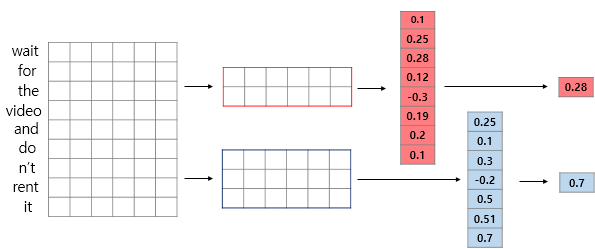

---
### **4. 신경망 설계하기**

지금까지 배운 개념들을 가지고 텍스트 분류를 위한 CNN을 설계해봅시다. 우선, 설계하고자 하는 신경망은 이진 분류를 위한 신경망입니다. 단, 시그모이드 함수가 아니라 소프트맥스 함수를 사용할 것이므로 출력층에서 뉴런의 개수가 2인 신경망을 설계합니다.

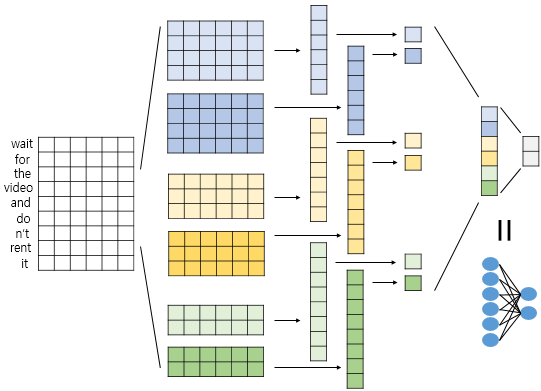

커널은 크기가 4인 커널 2개, 3인 커널 2개, 2인 커널 2개를 사용합니다. 문장의 길이가 9인 경우, 합성곱 연산을 한 후에는 각각 6차원 벡터 2개, 7차원 벡터 2개, 8차원 벡터 2개를 얻습니다. 벡터가 6개므로 맥스 풀링을 한 후에는 6개의 스칼라 값을 얻는데, 일반적으로 이렇게 얻은 스칼라값들은 전부 연결(concatenate)하여 하나의 벡터로 만들어줍니다. 이렇게 얻은 벡터는 1D CNN을 통해서 문장으로부터 얻은 벡터입니다. 이를 뉴런이 2개인 출력층에 완전 연결시키므로서(Dense layer를 사용) 텍스트 분류를 수행합니다.

---
### **5. 케라스(Keras)로 CNN 구현하기**

케라스로 1D 합성곱 층을 추가하는 코드는 다음과 같습니다.

```python
    from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

    model = Sequential()
    model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
```

각 인자에 대한 설명은 다음과 같습니다.


**num_filters** = 커널의 개수.  

**kernel_size** = 커널의 크기.  

**padding** = 패딩 방법.  
- valid : 패딩 없음. 제로 패딩없이 유효한(valid) 값만을 사용한다는 의미에서 valid.  
- same : 합성곱 연산 후에 출력이 입력과 동일한 차원을 가지도록 왼쪽과 오른쪽(또는 위, 아래)에 제로 패딩을 추가.  


**activation** = 활성화 함수.  

만약 위에서 설명한 맥스 풀링을 추가하고자 한다면 다음과 같이 코드를 작성할 수 있습니다.

```python
    model = Sequential()
    model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
    model.add(GlobalMaxPooling1D())
```

마지막 편집일시 : 2022년 11월 14일 4:17 오후